In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#%pip install sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [5]:
df = pd.read_csv("./data/USA_cars_datasets.csv")
df = df[['price', 'year', 'mileage']]

In [6]:
# Check for NA values
print(df.isna().sum())

price      0
year       0
mileage    0
dtype: int64


In [7]:
# Display head and dimensions of the dataset
print(df.head())
print(df.shape)

   price  year  mileage
0   6300  2008   274117
1   2899  2011   190552
2   5350  2018    39590
3  25000  2014    64146
4  27700  2018     6654
(2499, 3)


In [8]:
# Normalize year and mileage using Min-Max scaling
scaler = MinMaxScaler()
df[['year', 'mileage']] = scaler.fit_transform(df[['year', 'mileage']])

In [9]:
# Split data into training (80%) and test (20%) sets
X = df[['year', 'mileage']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Define k values to test
k_values = [3, 10, 25, 50, 100, 300]
mse_values = []

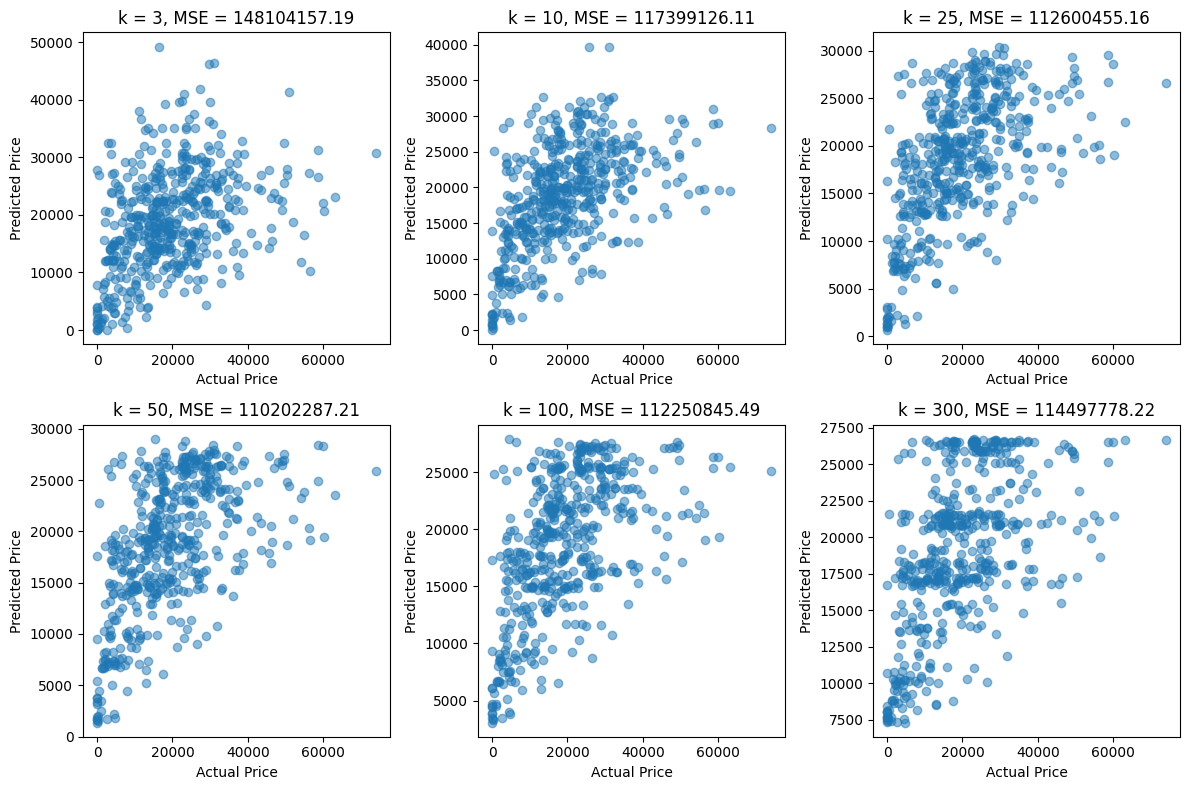

In [11]:
# Train and evaluate kNN for different k values
plt.figure(figsize=(12, 8))
for k in k_values:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_values.append(mse)
    
    # Scatter plot of actual vs predicted
    plt.subplot(2, 3, k_values.index(k) + 1)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.title(f"k = {k}, MSE = {mse:.2f}")
plt.tight_layout()
plt.show()

As we increase k, the model starts to get better- up to k = 50, then afterwards the model starts to get worse as we go to 100 and 300. It seems like there might be a number between k = 25 and 100 that would provide the lowest MSE

In [12]:
# Find optimal k
optimal_k = k_values[np.argmin(mse_values)]
print(f"Optimal k: {optimal_k}")

Optimal k: 50


As k increased, the model moved from overfitting (low k) to underfitting (high k). With the small k, predictions were highly variable and overfitted, wherease with the large k, predictions were more stable but lost detail- underfitted.
The best k balanced both to minimize MSE.